### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer,make_column_transformer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix,plot_confusion_matrix,roc_auc_score,roc_curve,plot_roc_curve
from sklearn.metrics import ConfusionMatrixDisplay

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

#### Attribute Information
- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]


- Angina is chest pain or discomfort caused  when your heart muscle doesn't get enough oxygen-rich blood. It may feel like pressure or squeezing in your chest. The discomfort also can occur in your shoulders, arms, neck, jaw, abdomen or back.

### Read the dataset

In [3]:
df = pd.read_csv('heart.csv')

### Understanding the data

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.shape

(918, 12)

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [9]:
df.describe(include=object).T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


In [10]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

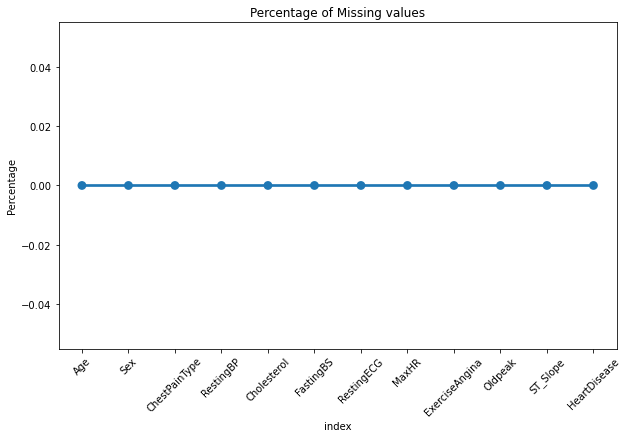

In [11]:
df_null = pd.DataFrame(df.isnull().sum()*100/df.shape[0]).reset_index()
plt.figure(figsize=(10,6))
sns.pointplot(x='index',y=0,data=df_null)
plt.xticks(rotation=45,fontsize=10)
plt.title("Percentage of Missing values")
plt.ylabel("Percentage")
plt.show()

## Exploratory Data Analysis

### Univariate Analysis

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

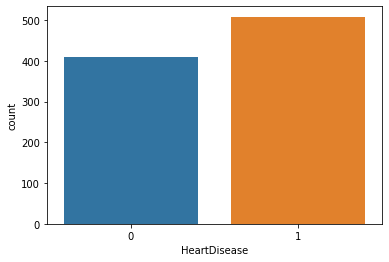

In [12]:
sns.countplot(x = df['HeartDisease'])

In [13]:
round(((df['HeartDisease'].value_counts()/df.shape[0])*100),2)

1    55.34
0    44.66
Name: HeartDisease, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Count'>

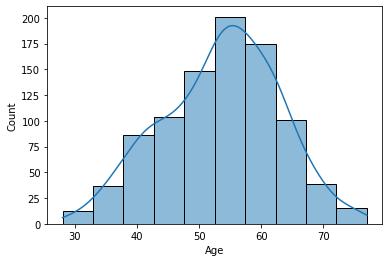

In [14]:
sns.histplot(x = df['Age'],kde=True,bins=10)

<AxesSubplot:xlabel='Sex', ylabel='count'>

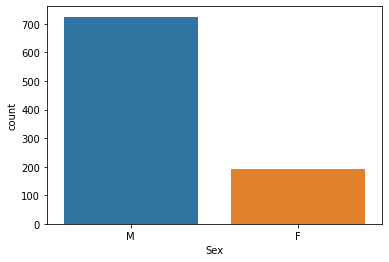

In [15]:
sns.countplot(x = df['Sex'])

In [16]:
round(((df['Sex'].value_counts()/df.shape[0])*100),2)

M    78.98
F    21.02
Name: Sex, dtype: float64

<AxesSubplot:xlabel='ChestPainType', ylabel='count'>

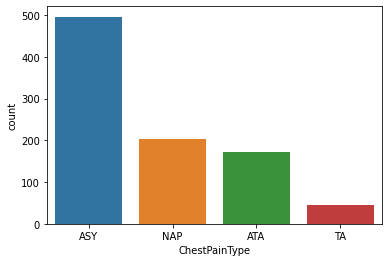

In [17]:
sns.countplot(x = df['ChestPainType'],order=df['ChestPainType'].value_counts().index[0:])

In [18]:
round(((df['ChestPainType'].value_counts()/df.shape[0])*100),2)

ASY    54.03
NAP    22.11
ATA    18.85
TA      5.01
Name: ChestPainType, dtype: float64

<AxesSubplot:ylabel='RestingBP'>

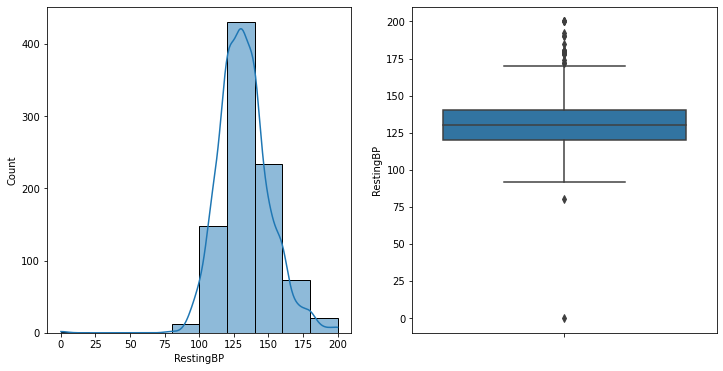

In [19]:
fig,axes = plt.subplots(1,2,figsize=(12,6))

sns.histplot(x = df['RestingBP'],kde=True,bins=10, data=df,ax=axes[0])
sns.boxplot(y = df['RestingBP'], data=df,ax=axes[1])

In [20]:
round(((df['RestingBP'].value_counts()/df.shape[0])*100),2)

120    14.38
130    12.85
140    11.66
110     6.32
150     5.99
       ...  
185     0.11
98      0.11
92      0.11
113     0.11
164     0.11
Name: RestingBP, Length: 67, dtype: float64

<AxesSubplot:ylabel='Cholesterol'>

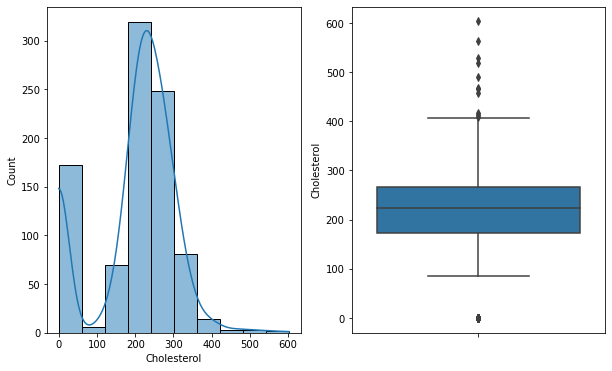

In [160]:
fig,axes = plt.subplots(1,2,figsize=(10,6))

sns.histplot(x = df['Cholesterol'],kde=True,bins=10,data=df,ax=axes[0])
sns.boxplot(y=df['Cholesterol'],data=df,ax=axes[1])

In [21]:
round(((df['Cholesterol'].value_counts()/df.shape[0])*100),2)

0      18.74
254     1.20
223     1.09
220     1.09
230     0.98
       ...  
392     0.11
316     0.11
153     0.11
466     0.11
131     0.11
Name: Cholesterol, Length: 222, dtype: float64

<AxesSubplot:xlabel='FastingBS', ylabel='count'>

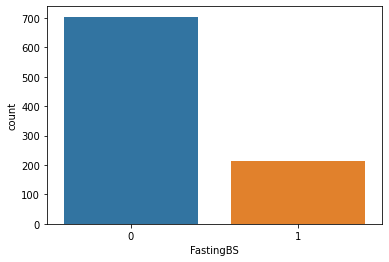

In [22]:
sns.countplot(x=df['FastingBS'])

In [23]:
round(((df['FastingBS'].value_counts()/df.shape[0])*100),2)

0    76.69
1    23.31
Name: FastingBS, dtype: float64

<AxesSubplot:xlabel='RestingECG', ylabel='count'>

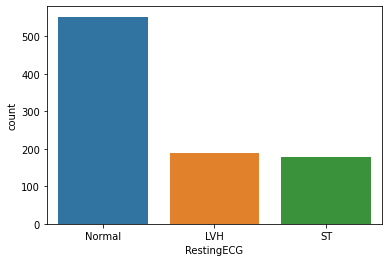

In [24]:
sns.countplot(x = df['RestingECG'],order=df['RestingECG'].value_counts().index[0:])

In [28]:
round(((df['RestingECG'].value_counts()/df.shape[0])*100),2)

Normal    60.13
LVH       20.48
ST        19.39
Name: RestingECG, dtype: float64

<AxesSubplot:ylabel='MaxHR'>

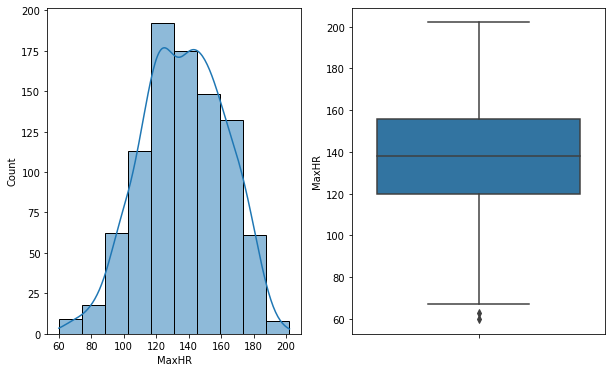

In [25]:
fig,axes = plt.subplots(1,2,figsize=(10,6))

sns.histplot(x=df['MaxHR'],kde=True,bins=10,data=df,ax=axes[0])
sns.boxplot(y=df['MaxHR'],data=df,ax=axes[1])

<AxesSubplot:xlabel='ExerciseAngina', ylabel='count'>

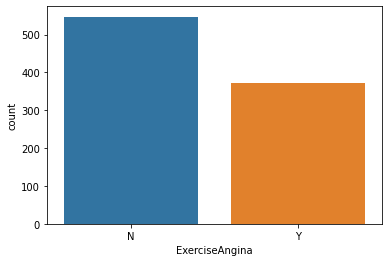

In [26]:
sns.countplot(x=df['ExerciseAngina'])

In [29]:
round(((df['ExerciseAngina'].value_counts()/df.shape[0])*100),2)

N    59.59
Y    40.41
Name: ExerciseAngina, dtype: float64

<AxesSubplot:ylabel='Oldpeak'>

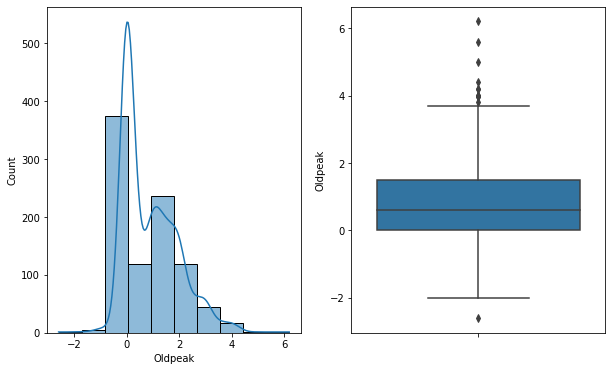

In [166]:
fig,axes = plt.subplots(1,2,figsize=(10,6))

sns.histplot(x=df['Oldpeak'],kde=True,bins=10,data=df,ax=axes[0])
sns.boxplot(y=df['Oldpeak'],data=df,ax=axes[1])

<AxesSubplot:xlabel='ST_Slope', ylabel='count'>

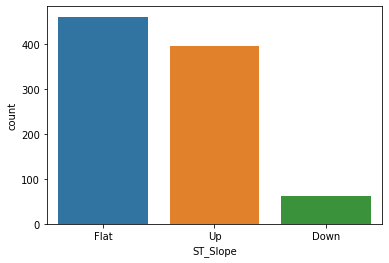

In [167]:
sns.countplot(x = df['ST_Slope'],order=df['ST_Slope'].value_counts().index[0:])

In [30]:
round(((df['ST_Slope'].value_counts()/df.shape[0])*100),2)

Flat    50.11
Up      43.03
Down     6.86
Name: ST_Slope, dtype: float64

<AxesSubplot:>

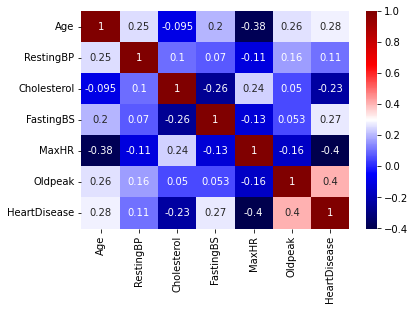

In [168]:
corr_df = df.corr()

sns.heatmap(data=corr_df,annot=True,cmap='seismic')

### Bivariate Analysis

In [169]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


#### Age and Heart Disease

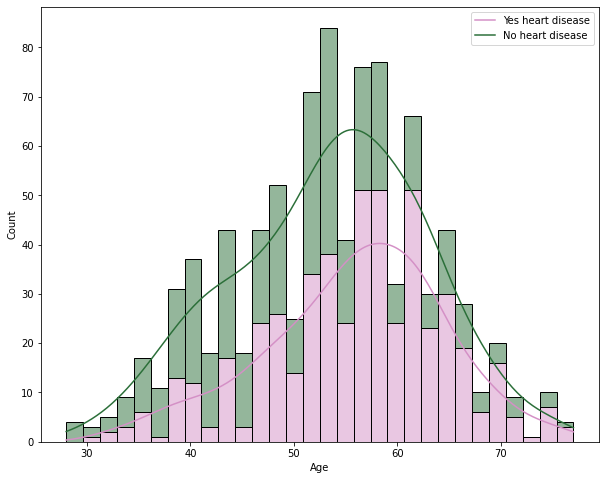

In [170]:
plt.figure(figsize=(10,8))

sns.histplot(x='Age',hue='HeartDisease',data=df,bins=30,multiple='stack',palette='cubehelix',kde=True)
labels=('Yes heart disease','No heart disease')
plt.legend(labels=labels,bbox_to_anchor=(1,1),loc='best')

In [31]:
# df[df.Age == 50].groupby('HeartDisease').Age.count().reset_index()

In [172]:
(df.groupby('Sex')['HeartDisease'].value_counts()/df.shape[0])*100

Sex  HeartDisease
F    0               15.577342
     1                5.446623
M    1               49.891068
     0               29.084967
Name: HeartDisease, dtype: float64

#### Sex, Age and Heart Disease

<AxesSubplot:xlabel='Sex', ylabel='Age'>

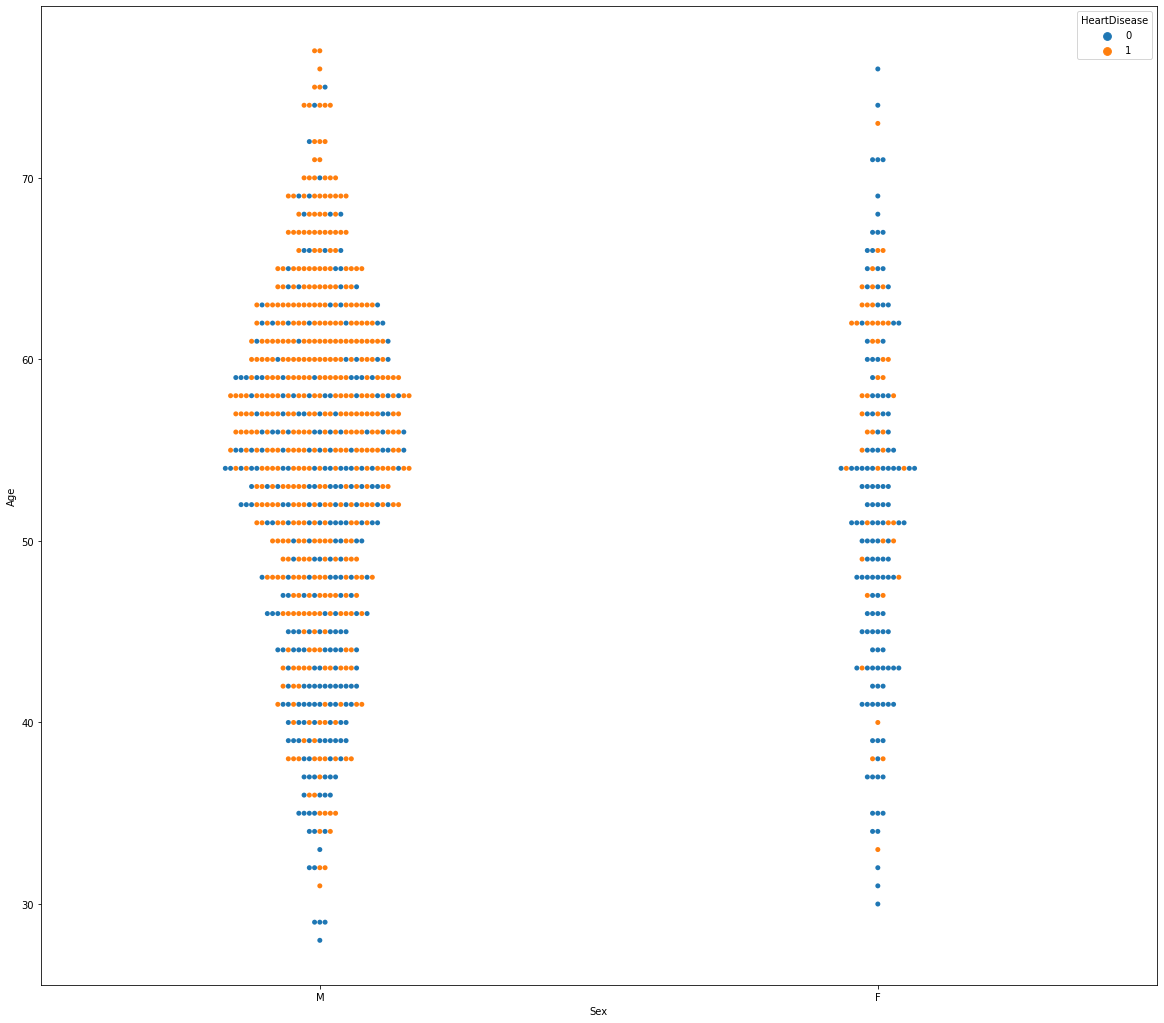

In [32]:
fig,ax = plt.subplots(figsize=(20,18))

sns.swarmplot(x = 'Sex',y='Age',hue ='HeartDisease',data=df)
#labels=('Yes heart disease','No heart disease')

#plt.legend(labels=labels,bbox_to_anchor=(1,1),loc='best')


#### Sex and Heart Disease

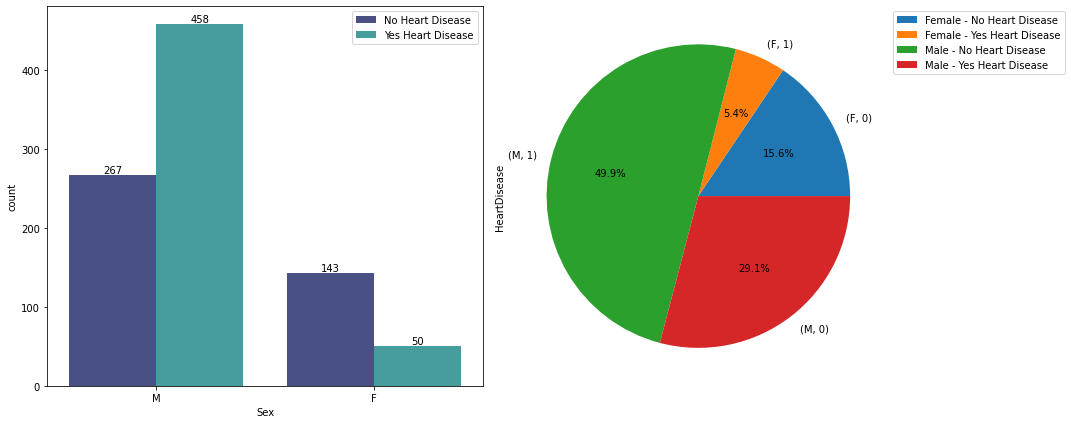

In [34]:
fig, ax = plt.subplots(1,2,figsize=(15,6))

axes = sns.countplot(x = 'Sex',hue = 'HeartDisease',data=df,palette='mako',ax=ax[0])
labels = ['No Heart Disease','Yes Heart Disease']
for container in axes.containers:
    axes.bar_label(container)
axes.legend(labels=labels,bbox_to_anchor=(1,1),loc='best')

labels_1 = ['Female - No Heart Disease','Female - Yes Heart Disease','Male - No Heart Disease',
            'Male - Yes Heart Disease']
df.groupby('Sex')['HeartDisease'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1])
plt.legend(labels=labels_1,bbox_to_anchor=(1,1),loc='best')
plt.tight_layout()

#### Chest Pain and Heart Disease

In [36]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

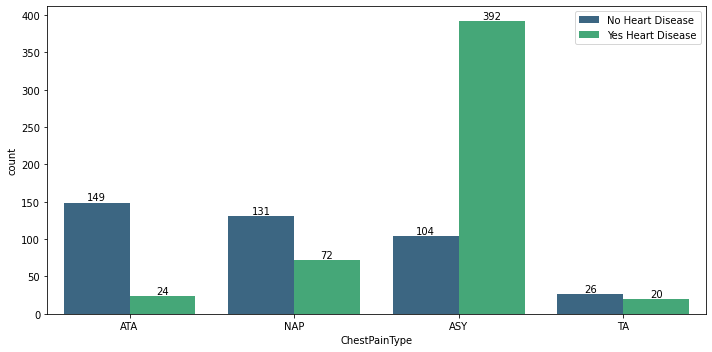

In [37]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x = 'ChestPainType',hue='HeartDisease',data=df,palette='viridis')
labels = ['No Heart Disease','Yes Heart Disease']

for container in ax.containers:
    ax.bar_label(container)

ax.legend(labels=labels,bbox_to_anchor=(1,1),loc='best')
plt.tight_layout()

#### RestingBP and Heart Disease

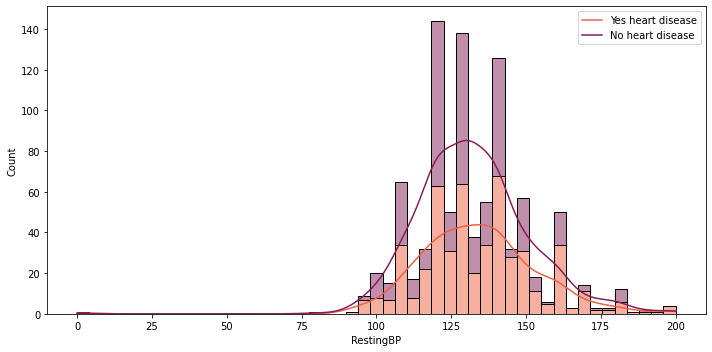

In [38]:
plt.figure(figsize=(10,5))

sns.histplot(x='RestingBP',hue='HeartDisease',data=df,multiple='stack',palette='rocket',kde=True)
labels=('Yes heart disease','No heart disease')
plt.legend(labels=labels,bbox_to_anchor=(1,1),loc='best')
plt.tight_layout()

#### Cholesterol and Heart Disease

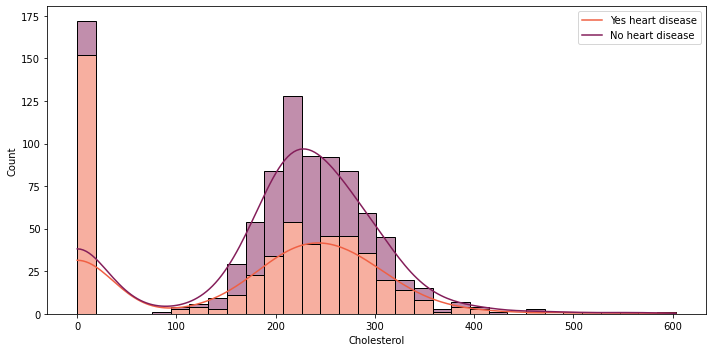

In [39]:
plt.figure(figsize=(10,5))

sns.histplot(x='Cholesterol',hue='HeartDisease',data=df,multiple='stack',palette='rocket',kde=True)
labels=('Yes heart disease','No heart disease')
plt.legend(labels=labels,bbox_to_anchor=(1,1),loc='best')
plt.tight_layout()

#### FastingBS and HeartDisease

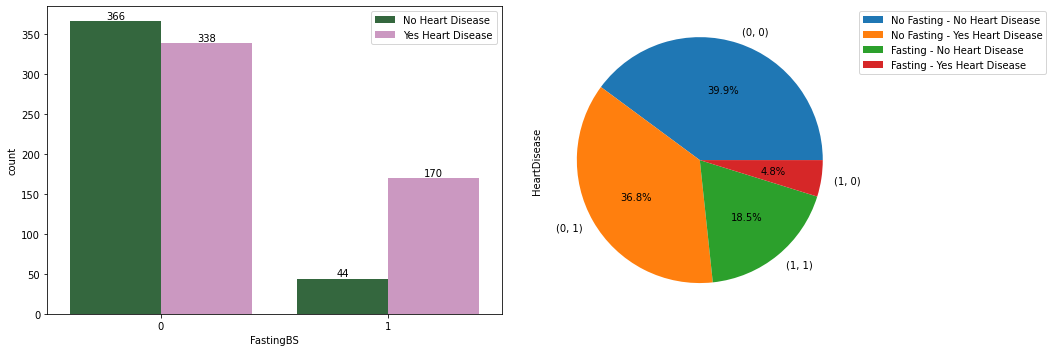

In [41]:
fig,axes = plt.subplots(1,2,figsize=(15,5))


ax= sns.countplot(x = 'FastingBS',hue='HeartDisease',data=df,palette='cubehelix',ax=axes[0])
labels = ['No Heart Disease','Yes Heart Disease']
for container in ax.containers:
    ax.bar_label(container)
ax.legend(labels=labels,bbox_to_anchor=(1,1),loc='best')


labels_1 = ['No Fasting - No Heart Disease','No Fasting - Yes Heart Disease','Fasting - No Heart Disease',
            'Fasting - Yes Heart Disease',]
df.groupby('FastingBS')['HeartDisease'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[1])
plt.legend(labels=labels_1,bbox_to_anchor=(1,1),loc='best')

plt.tight_layout()

#### RestingECG and HeartDisease

In [42]:
df.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

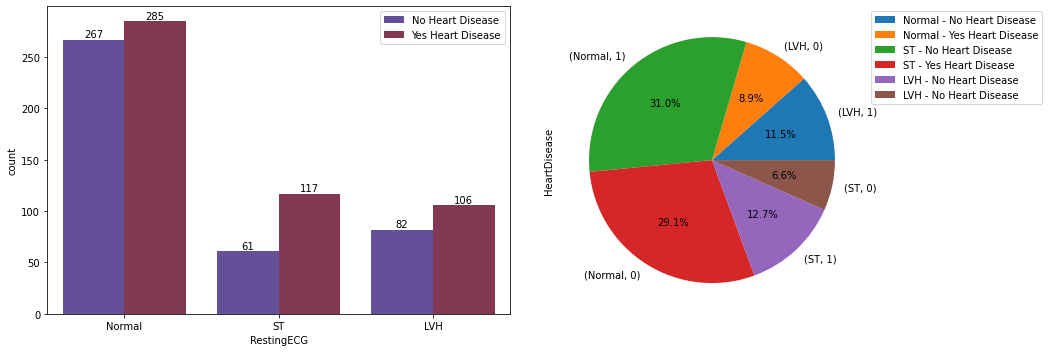

In [43]:
fig,axes = plt.subplots(1,2,figsize=(15,5))

ax = sns.countplot(x = 'RestingECG',hue='HeartDisease',data=df,ax=axes[0],palette='twilight')
labels = ['No Heart Disease','Yes Heart Disease']

for container in ax.containers:
    ax.bar_label(container)
ax.legend(labels=labels,bbox_to_anchor=(1,1),loc='best')


labels_1 = ['Normal - No Heart Disease','Normal - Yes Heart Disease','ST - No Heart Disease','ST - Yes Heart Disease',
          'LVH - No Heart Disease','LVH - No Heart Disease']

df.groupby('RestingECG')['HeartDisease'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[1])
plt.legend(labels=labels_1,bbox_to_anchor=(1,1),loc='best')

plt.tight_layout()

#### MaxHR and HeartDisease

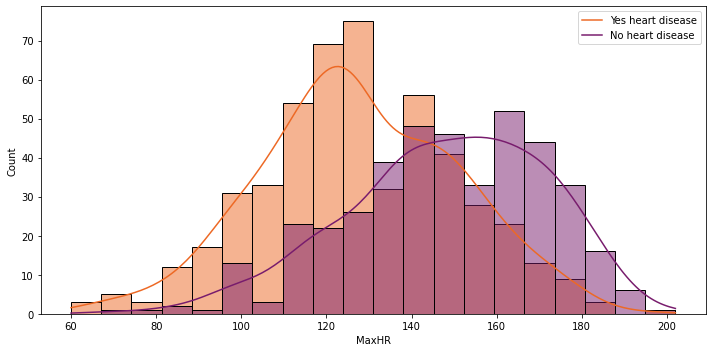

In [44]:
plt.figure(figsize=(10,5))

sns.histplot(x='MaxHR',hue='HeartDisease',data=df,palette='inferno',kde=True)
labels=('Yes heart disease','No heart disease')
plt.legend(labels=labels,bbox_to_anchor=(1,1),loc='best')
plt.tight_layout()

#### ExerciseAngina and HeartDisease

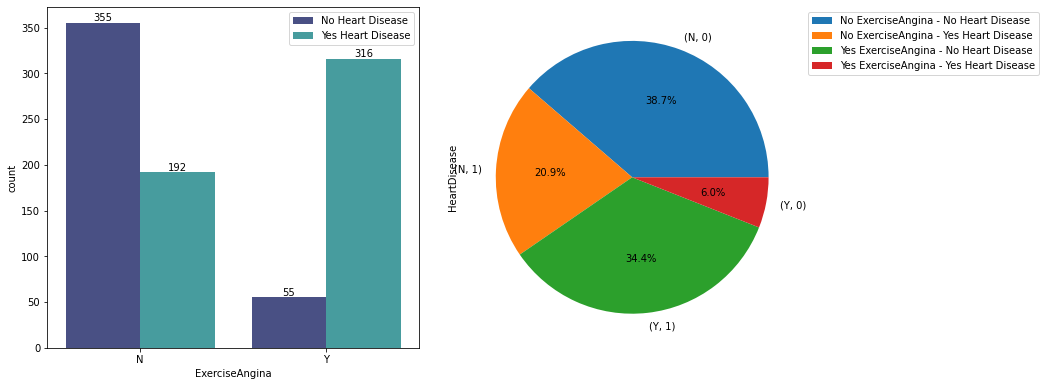

In [45]:
fig, ax = plt.subplots(1,2,figsize=(15,6))

axes = sns.countplot(x = 'ExerciseAngina',hue = 'HeartDisease',data=df,palette='mako',ax=ax[0])
labels = ['No Heart Disease','Yes Heart Disease']
for container in axes.containers:
    axes.bar_label(container)
axes.legend(labels=labels,bbox_to_anchor=(1,1),loc='best')

labels_1 = ['No ExerciseAngina - No Heart Disease','No ExerciseAngina - Yes Heart Disease','Yes ExerciseAngina - No Heart Disease',
            'Yes ExerciseAngina - Yes Heart Disease']
df.groupby('ExerciseAngina')['HeartDisease'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1])
plt.legend(labels=labels_1,bbox_to_anchor=(1,1),loc='best')
plt.tight_layout(pad=3, w_pad=4, h_pad=4)

#### Oldpeak and HeartDisease

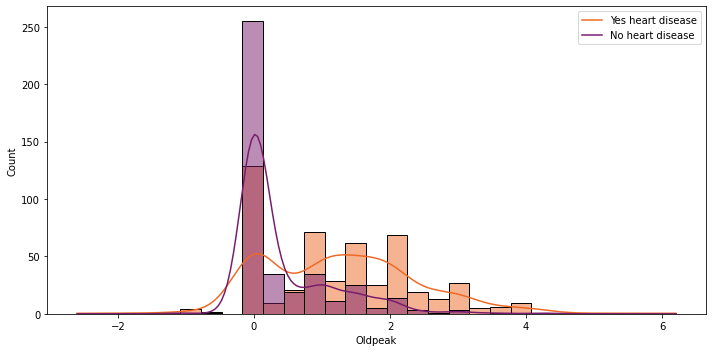

In [46]:
plt.figure(figsize=(10,5))

sns.histplot(x='Oldpeak',hue='HeartDisease',data=df,palette='inferno',kde=True)
labels=('Yes heart disease','No heart disease')
plt.legend(labels=labels,bbox_to_anchor=(1,1),loc='best')
plt.tight_layout()

### ST_Slope and HeartDisease

In [47]:
df.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

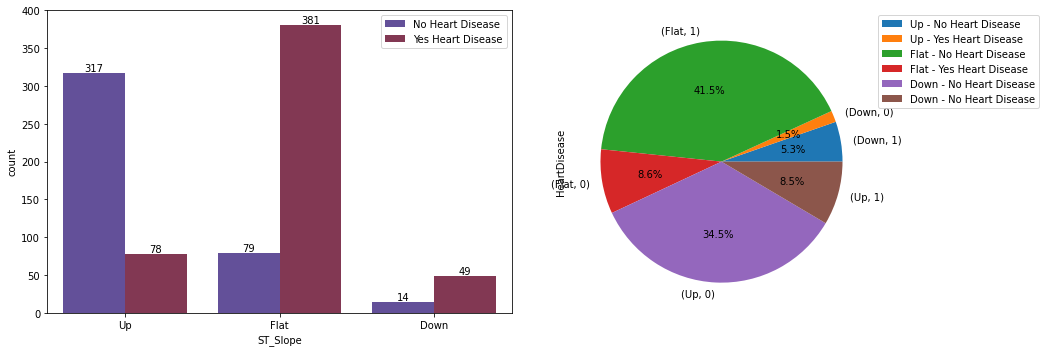

In [48]:
fig,axes = plt.subplots(1,2,figsize=(15,5))

ax = sns.countplot(x = 'ST_Slope',hue='HeartDisease',data=df,ax=axes[0],palette='twilight')
labels = ['No Heart Disease','Yes Heart Disease']

for container in ax.containers:
    ax.bar_label(container)
ax.legend(labels=labels,bbox_to_anchor=(1,1),loc='best')


labels_1 = ['Up - No Heart Disease','Up - Yes Heart Disease','Flat - No Heart Disease','Flat - Yes Heart Disease',
          'Down - No Heart Disease','Down - No Heart Disease']

df.groupby('ST_Slope')['HeartDisease'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[1])
plt.legend(labels=labels_1,bbox_to_anchor=(1,1),loc='best')

plt.tight_layout()

### Pipeline for data preprocessing, model selection, hyperparameter tuning etc.

In [49]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [50]:
X = df.drop(columns='HeartDisease')
y = df['HeartDisease']

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#### Without Scaling

In [61]:
Accuracy = []
Score = []
Model_name = []
Cross_Val = []

LR = LogisticRegression()
DT = DecisionTreeClassifier()
KN = KNeighborsClassifier()
RFC = RandomForestClassifier()
ABC = AdaBoostClassifier()
GBC = GradientBoostingClassifier()
SVM = SVC()
XGB = XGBClassifier()


models = [LR,DT,KN,RFC,ABC,GBC,SVM,XGB]

trf1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'])
    ],remainder='passthrough')

for model in models:
    pipe = Pipeline([
    ('trf1',trf1),
    ('model',model)])
    
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)
    
    Score.append(round(pipe.score(X_test,y_test),4))
    Accuracy.append(round(accuracy_score(y_test,y_pred),4))
    Cross_Val.append(np.mean(cross_val_score(pipe,X_test,y_test,scoring='accuracy',cv=StratifiedKFold(n_splits=10))))
    

model_names = ['Logistic Regression','Decision Tree','K Neighbours','Random Forest','AdaBoost','Gradient Boost','Support Vector',
              'XG Boost']

df_no_scale = pd.DataFrame({'Score':Score,
                       'Accuracy':Accuracy,
                       'Cross_Val':Cross_Val}, index=model_names)

[21:31:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:31:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:31:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:31:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [62]:
df_no_scale.sort_values(by='Accuracy',ascending=False)

,Score,Accuracy,Cross_Val
Random Forest,0.8696,0.8696,0.886257
XG Boost,0.8696,0.8696,0.885965
Gradient Boost,0.8641,0.8641,0.896784
Logistic Regression,0.8533,0.8533,0.857895
Decision Tree,0.8478,0.8478,0.786550
AdaBoost,0.8478,0.8478,0.858772
K Neighbours,0.7065,0.7065,0.685380
Support Vector,0.6848,0.6848,0.728070


In [64]:
df_no_scale[df_no_scale['Accuracy'] == df_no_scale['Accuracy'].max()]

,Score,Accuracy,Cross_Val
Random Forest,0.8696,0.8696,0.886257
XG Boost,0.8696,0.8696,0.885965


### With Scaling

In [65]:
Accuracy = []
Score = []
Model_name = []
Cross_Val = []

LR = LogisticRegression()
DT = DecisionTreeClassifier()
KN = KNeighborsClassifier()
RFC = RandomForestClassifier()
ABC = AdaBoostClassifier()
GBC = GradientBoostingClassifier()
SVM = SVC()
XGB = XGBClassifier()


trf_scale = StandardScaler()

models = [LR,DT,KN,RFC,ABC,GBC,SVM,XGB]

for model in models:
    pipe = Pipeline([
    ('trf1',trf1),
    ('trf_scale',trf_scale),
    ('model',model)])
    
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)
    
    Score.append(round(pipe.score(X_test,y_test),4))
    Accuracy.append(round(accuracy_score(y_test,y_pred),4))
    Cross_Val.append(np.mean(cross_val_score(pipe,X_test,y_test,scoring='accuracy',cv=StratifiedKFold(n_splits=10))))
    
 
# cm = confusion_matrix(y_test,y_pred)
#   cm_display = ConfusionMatrixDisplay(cm).plot()
#    plot_roc_curve(pipe,X_test,y_test)


model_names = ['Logistic Regression','Decision Tree','K Neighbours','Random Forest','AdaBoost','Gradient Boost','Support Vector',
              'XG Boost']

df_scal = pd.DataFrame({'Score':Score,
                       'Accuracy':Accuracy,
                       'Cross_Val':Cross_Val}, index=model_names)

[21:32:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:32:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:32:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:32:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [66]:
df_scal.sort_values(by='Accuracy',ascending=False)

,Score,Accuracy,Cross_Val
Support Vector,0.8750,0.8750,0.869883
Random Forest,0.8696,0.8696,0.886257
XG Boost,0.8696,0.8696,0.885965
Gradient Boost,0.8641,0.8641,0.896784
Logistic Regression,0.8533,0.8533,0.837135
K Neighbours,0.8533,0.8533,0.859064
AdaBoost,0.8478,0.8478,0.858772
Decision Tree,0.8424,0.8424,0.797368


In [67]:
df_scal[df_scal['Accuracy'] == df_scal['Accuracy'].max()]

,Score,Accuracy,Cross_Val
Support Vector,0.875,0.875,0.869883


### Final Model - Random Forest

Score 0.8695652173913043
Accuracy Score 0.8695652173913043
Cross Val Score  0.8918128654970762
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



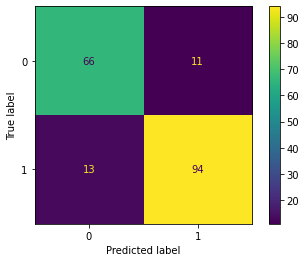

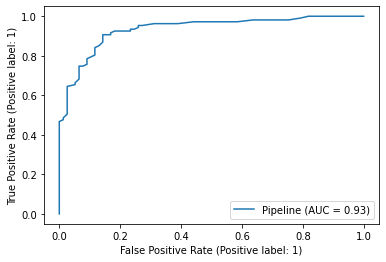

In [68]:
trf1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'])
],remainder='passthrough')

trf_scale = StandardScaler()

trf_RFC = RandomForestClassifier()

rf_trf = Pipeline([
    ('trf1',trf1),
    ('trf_scale',trf_scale),
    ('trf_RFC',trf_RFC)
])

rf_trf.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print("Score {}".format(rf_trf.score(X_test,y_test)))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Cross Val Score ",np.mean(cross_val_score(rf_trf,X_test,y_test,scoring='accuracy',cv=StratifiedKFold(n_splits=10))))
print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

plot_roc_curve(rf_trf,X_test,y_test)

## Hyperparamter tuning

In [215]:
grid_param = {
    'trf_RFC':[RandomForestClassifier()],
    'trf_RFC__criterion': ['gini', 'entropy'],
    'trf_RFC__max_features':['auto','sqrt','log2'],
    'trf_RFC__n_estimators':[int(x) for x in np.linspace(start=70, stop=160, num=5)],
    'trf_RFC__max_depth':[int(x) for x in np.linspace(start=1,stop=40, num=5)],
    'trf_RFC__min_samples_leaf':[int(x) for x in np.linspace(start=1,stop=10, num=5)],
    'trf_RFC__min_samples_split':[int(x) for x in np.linspace(start=1,stop=10, num=5)]
}


In [216]:
kf = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(rf_trf,param_grid=grid_param, cv = kf,verbose=2,  n_jobs=-1)

In [217]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 3750 candidates, totalling 18750 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('col_tnf',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse=False),
                                                                         ['Sex',
                                                                          'ChestPainType',
                                                                          'RestingECG',
                                                                          'ExerciseAngina',
                                                                          'ST_Slope'])])),
                                       ('trf_scale', Standar

In [218]:
grid_search.best_params_

{'trf_RFC': RandomForestClassifier(criterion='entropy', max_depth=40, max_features='sqrt',
                        min_samples_split=3, n_estimators=137),
 'trf_RFC__criterion': 'entropy',
 'trf_RFC__max_depth': 40,
 'trf_RFC__max_features': 'sqrt',
 'trf_RFC__min_samples_leaf': 1,
 'trf_RFC__min_samples_split': 3,
 'trf_RFC__n_estimators': 137}

In [219]:
print("The mean accuracy of the model is:",grid_search.score(X_test,y_test))

The mean accuracy of the model is: 0.8641304347826086


## Final model: With hyperparameters

Score 0.8641304347826086
Accuracy Score 0.8695652173913043
Cross Val Score  0.8865497076023392
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



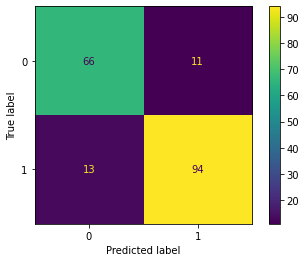

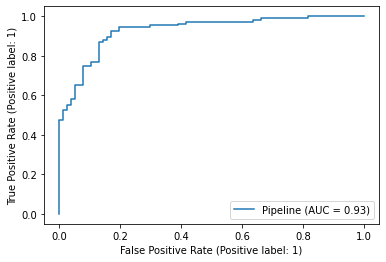

In [221]:
trf1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'])
],remainder='passthrough')

trf_scale = StandardScaler()

trf_RFC = RandomForestClassifier(criterion='entropy', max_depth=40, max_features='sqrt',min_samples_leaf=1,
                        min_samples_split=3, n_estimators=137)

rf_trf = Pipeline([
    ('trf1',trf1),
    ('trf_scale',trf_scale),
    ('trf_RFC',trf_RFC)
])

rf_trf.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print("Score {}".format(rf_trf.score(X_test,y_test)))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Cross Val Score ",np.mean(cross_val_score(rf_trf,X_test,y_test,scoring='accuracy',cv=StratifiedKFold(n_splits=10))))
print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

plot_roc_curve(rf_trf,X_test,y_test)